### show an example of image and label

In [2]:
import idx2numpy
from scipy import ndimage
from scipy import misc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from pylab import rcParams
from bokeh.plotting import figure, show, output_file
rcParams['figure.figsize'] = 15, 10
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from PIL import Image
from StringIO import StringIO
import base64
import pprint

In [3]:
images = idx2numpy.convert_from_file(open('train-images.idx3-ubyte', 'rb'))
labels = idx2numpy.convert_from_file(open('train-labels.idx1-ubyte', 'rb'))

In [4]:
def Show(n):
    plt.imshow(images[n], cmap=plt.cm.gray)
    plt.axis('off')
    plt.show()
    print "NUMBER"
    print labels[n]

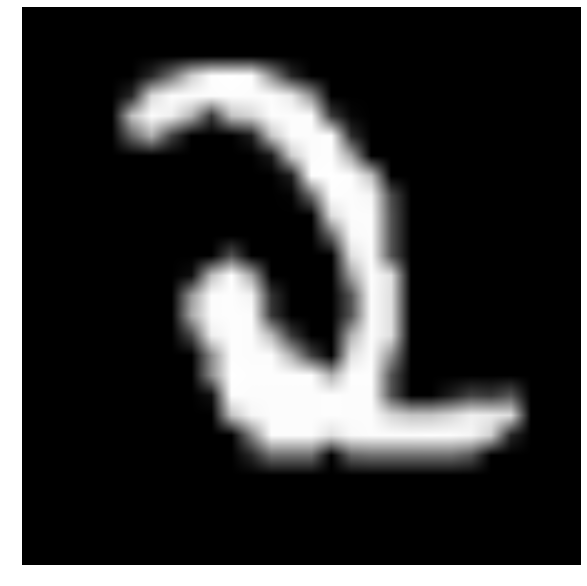

NUMBER
2


In [5]:
Show(400)

----------

### create PCA classifier

In [468]:
from sklearn.decomposition import RandomizedPCA, PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split

In [383]:
data = []
for im in images:
    b=[]
    for row in im:
        for d in row:
            b.append(d)
    data.append(b)

In [439]:
images_bank = dict()
for i in range(0,10):
    images_bank[i] = []
    
for i in range(0,len(labels)):
    images_bank[labels[i]].append(data[i])

In [444]:
M_vecs = dict()
for i in range(0,10):
    M_vecs[i] = np.vstack( [v for v in images_bank[i]] ).transpose()

In [570]:
def pca(label, n):
    pca = RandomizedPCA(n_components=n)
    std_scaler = StandardScaler()

    X_train, X_test, y_train, y_test = train_test_split(images_bank[label], [label]*len(images_bank[label]), test_size=0.1)

    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)

    X_train = std_scaler.fit_transform(X_train)
    X_test = std_scaler.transform(X_test)
    
    return (X_train, X_test, y_train, y_test, std_scaler, pca)

In [571]:
X_train, X_test, y_train, y_test, std_scaler, pca = pca(8, 20)

In [558]:
# data_original = np.dot(X_train, pca.components_) + pca.mean_

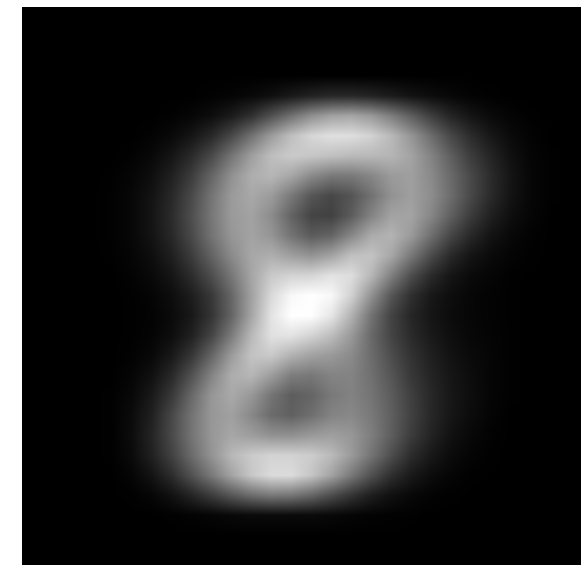

In [574]:
aa=pca.inverse_transform(X_train[2]).reshape(28,28)
# a = data_original[0].reshape(28,28)
plt.imshow(aa, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

------

### training the classifier (with K-Nearest Neighbors classifier)

In [492]:
def pca_for_classifier(n):
    pca_classifier = RandomizedPCA(n_components=n)
    std_scaler = StandardScaler()

    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.1)

    X_train = pca_classifier.fit_transform(X_train)
    X_test = pca_classifier.transform(X_test)

    X_train = std_scaler.fit_transform(X_train)
    X_test = std_scaler.transform(X_test)
    
    return (X_train, X_test, y_train, y_test, std_scaler, pca_classifier)

In [493]:
X_train, X_test, y_train, y_test, std_scaler, pca_classifier = pca_for_classifier(20)

In [494]:
clf = KNeighborsClassifier(n_neighbors=13)
clf.fit(X_train, y_train)
print "done"
print "="*20
print clf

print "Confusion Matrix"
print "="*40
print confusion_matrix(y_test, clf.predict(X_test))

done
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=13, p=2, weights='uniform')
Confusion Matrix
[[573   0   1   0   0   1   3   0   0   2]
 [  0 679   2   1   2   0   0   2   1   0]
 [  3   1 592   4   0   0   1   8   3   1]
 [  0   1   6 589   0   9   0   4   8   0]
 [  1   4   0   0 568   0   2   0   1  18]
 [  3   0   1  10   0 485   6   1   1   5]
 [  1   1   0   0   1   1 597   0   0   1]
 [  0   3   2   0   0   1   0 616   2   6]
 [  1   4   4  15   3   4   4   1 550   7]
 [  0   5   2   8  12   3   1   7   3 531]]


## prediction

In [495]:
def transform(f):
        STANDARD_SIZE = (28, 28)
        img = Image.open(f).convert('L')
        img = img.getdata()
        img = img.resize(STANDARD_SIZE)
        return img

def predict(img):
        x = pca_classifier.transform([img])
        x = std_scaler.transform(x)
        results = {"label": clf.predict(x)[0]}
        probs = {"prob_" + str(i) : prob for i, prob in enumerate(clf.predict_proba(x)[0])}
        results['probs'] = probs
        return results

In [496]:
a = transform("test_2.png")

In [497]:
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(predict(a))
print "="*10
print "Prediction for number", predict(a)['label']
print "with probability of", predict(a)['probs']['prob_%d' %(predict(a)['label'])]

{   'label': 2,
    'probs': {   'prob_0': 0.0,
                 'prob_1': 0.0,
                 'prob_2': 0.53846153846153844,
                 'prob_3': 0.38461538461538464,
                 'prob_4': 0.0,
                 'prob_5': 0.0,
                 'prob_6': 0.0,
                 'prob_7': 0.076923076923076927,
                 'prob_8': 0.0,
                 'prob_9': 0.0}}
Prediction for number 2
with probability of 0.538461538462


---------

## Component distributions

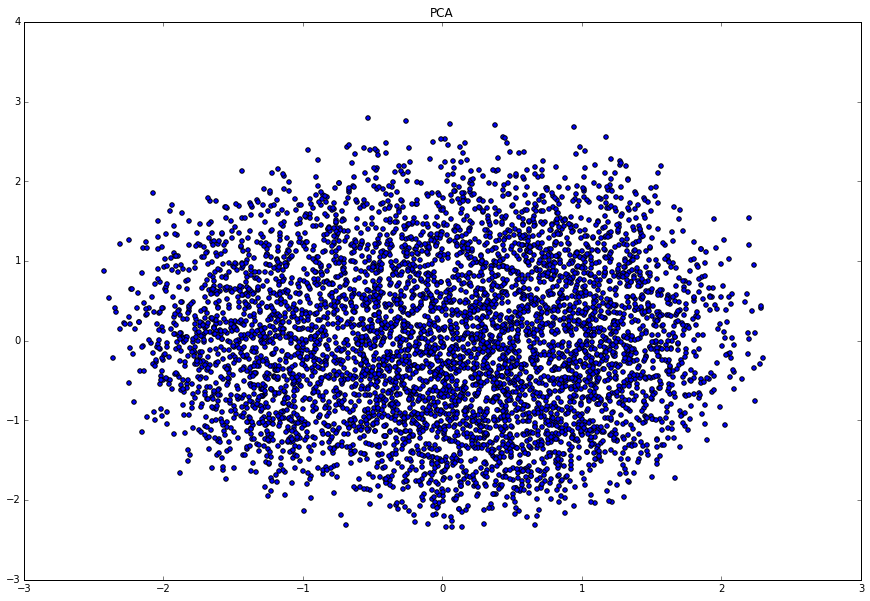

In [506]:
plt.scatter(X_train[:,0], X_train[:,1])
plt.title('PCA')
plt.show()


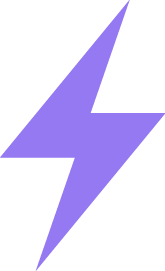

Running local mode, some functionality limited.



In [507]:
from lightning import Lightning
from numpy import random, sqrt, asarray
from sklearn import datasets

lgn = Lightning(ipython=True, local=True)

In [508]:
i=12
j=13

x=X_train[:,i]
y=X_train[:,j]

r = map(lambda (x, y): sqrt(x ** 2 + y ** 2), zip(x,y))
s = asarray(r)

c = [178,34,34]

lgn.scatter(X_train[:,i], X_train[:,j], color=c, size=s, xaxis='component %d' %(i), yaxis='component %d' %(j))